In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def disp_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

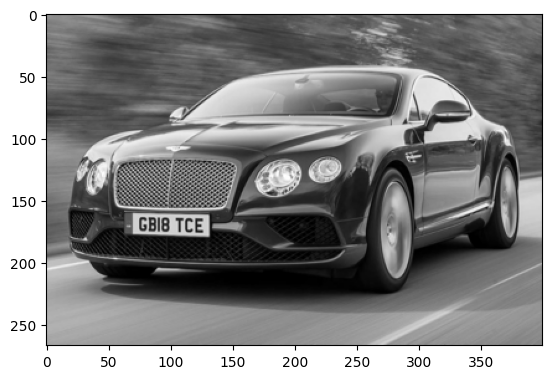

In [3]:
img = cv2.imread("Cars293.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
disp_img(gray)

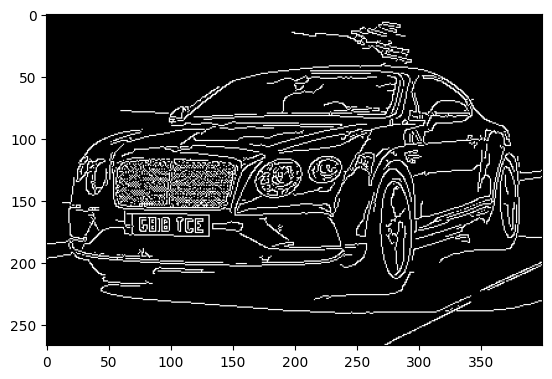

In [13]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged=  cv2.Canny(bfilter, 30, 200)
disp_img(edged)

In [5]:
import imutils
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx)==4:
        location=approx
        break

In [7]:
mask = np.zeros(gray.shape, dtype='uint8')
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

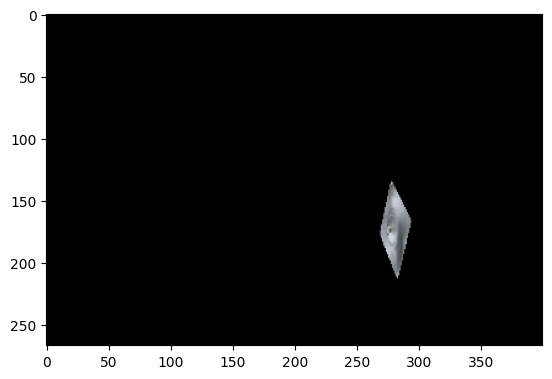

In [8]:
disp_img(new_image)